In [54]:
import numpy as np
import pandas as pd

import urllib

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support as score

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [9]:
address = 'Attrition Training.csv'
attrition = pd.read_csv(address)
attrition.head()

ID  First Name Last Name  Age Attrition     BusinessTravel  DailyRate  \
0   1     Heather      Hill   41       Yes      Travel_Rarely       1102   
1   2      Audrey    Howard   49        No  Travel_Frequently        279   
2   3      Oliver      Bell   37       Yes      Travel_Rarely       1373   
3   4   Alexandra   Stewart   33        No  Travel_Frequently       1392   
4   5  Bernadette     Grant   27        No      Travel_Rarely        591   

               Department  DistanceFromHome  Education          ...           \
0                   Sales                 1          2          ...            
1  Research & Development                 8          1          ...            
2  Research & Development                 2          2          ...            
3  Research & Development                 3          4          ...            
4  Research & Development                 2          1          ...            

  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                        1             80                 0   
1                        4             80                 1   
2                        2             80                 0   
3                        3             80                 0   
4                        4             80                 1   

   TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                     0                1               6   
1                 10                     3                3              10   
2                  7                     3                3               0   
3                  8                     3                3               8   
4                  6                     3                3               2   

   YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                       0                     5  
1                   7                       1                     7  
2                   0                       0                     0  
3                   7                       3                     0  
4                   2                       2                     2  

[5 rows x 38 columns]

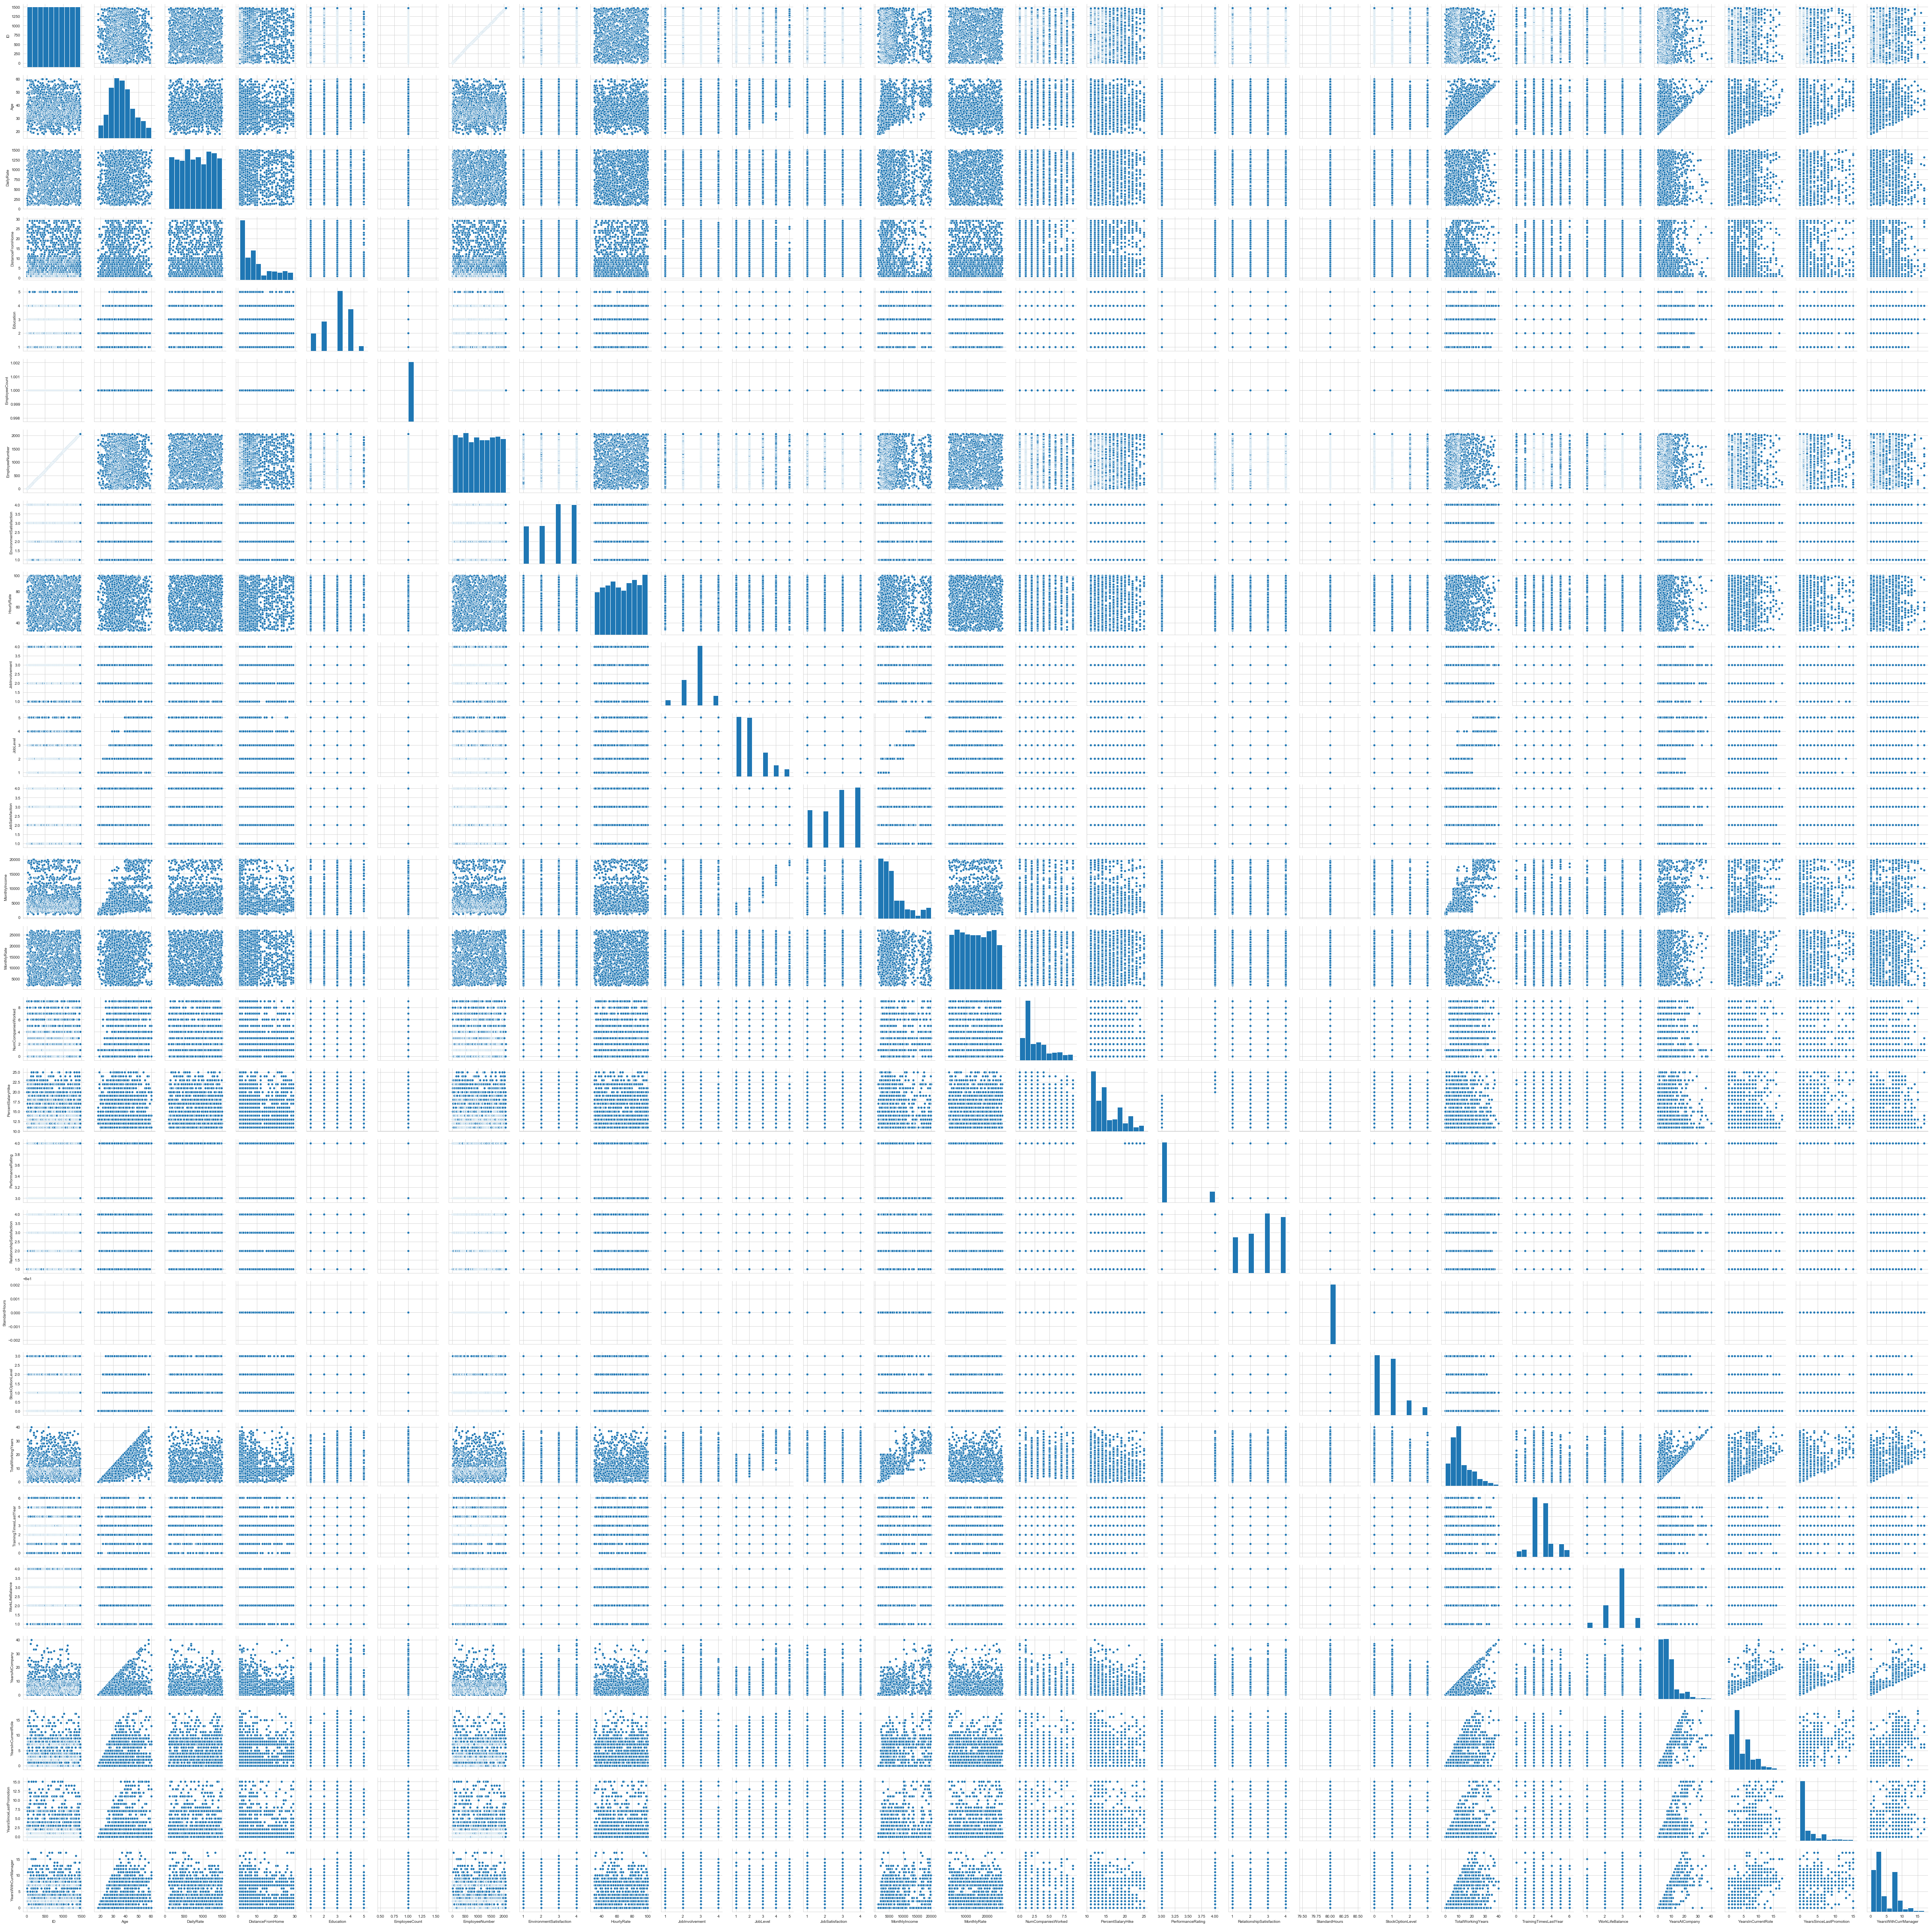

In [13]:
sb.pairplot(attrition)

In [44]:
le = preprocessing.LabelEncoder()
attrition = attrition.apply(le.fit_transform)

X = attrition.loc[:,['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
y = attrition.loc[:,'Attrition']

print(X)
print(y)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      23               2        624           2                 0          1   
1      31               1        113           1                 7          0   
2      19               2        805           1                 1          1   
3      15               1        820           1                 2          3   
4       9               2        312           1                 1          0   
5      14               1        572           1                 1          1   
6      41               2        770           1                 2          2   
7      12               2        794           1                23          0   
8      20               1         78           1                22          2   
9      18               2        751           1                26          2   
10     17               2        452           1                15          2   
11     11               2   

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=17)

In [61]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
#print(accuracy_score(y_expect, y_pred))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
Precision: 0.385 / Recall: 0.217 / Accuracy: 0.823


In [60]:
MultiNB = MultinomialNB()

MultiNB.fit(X_train, y_train)
print(MultiNB)

y_pred = MultiNB.predict(X_test)
#print(accuracy_score(y_expect, y_pred))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Precision: 0.242 / Recall: 0.652 / Accuracy: 0.626


In [57]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)
#print(accuracy_score(y_expect, y_pred))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

GaussianNB(priors=None, var_smoothing=1e-09)
Precision: 0.593 / Recall: 0.696 / Accuracy: 0.878


In [58]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
#print(accuracy_score(y_expect, y_pred))
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
Precision: 0.714 / Recall: 0.217 / Accuracy: 0.864
